In [67]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
import numpy as np
import pandas as pd
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

In [68]:
data = pd.read_csv('CarPrice_Assignment.csv')

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [70]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# data cleaning

In [72]:
Company_Name = data["CarName"].apply(lambda x: x.split(" ")[0])
data.insert(2,"CompanyName",Company_Name)
data.drop(columns=["CarName"],inplace=True)
data = data.drop(columns=["enginelocation"],axis=1)

In [73]:
data["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [74]:
def replace(a,b):
    data["CompanyName"].replace(a,b,inplace=True)

replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

# data visualization

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10608\2213200484.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["price"],color="red",kde=True)


Text(0.5, 1.0, 'Car Price Distribution')

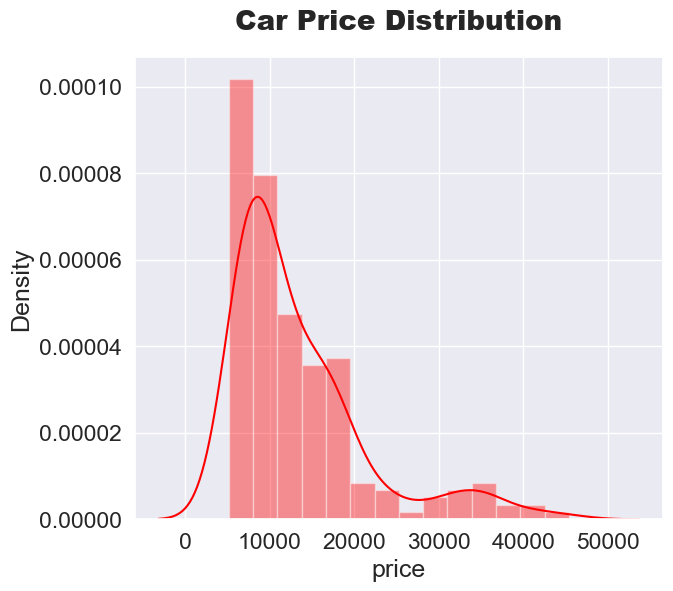

In [76]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(data["price"],color="red",kde=True)
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=20)

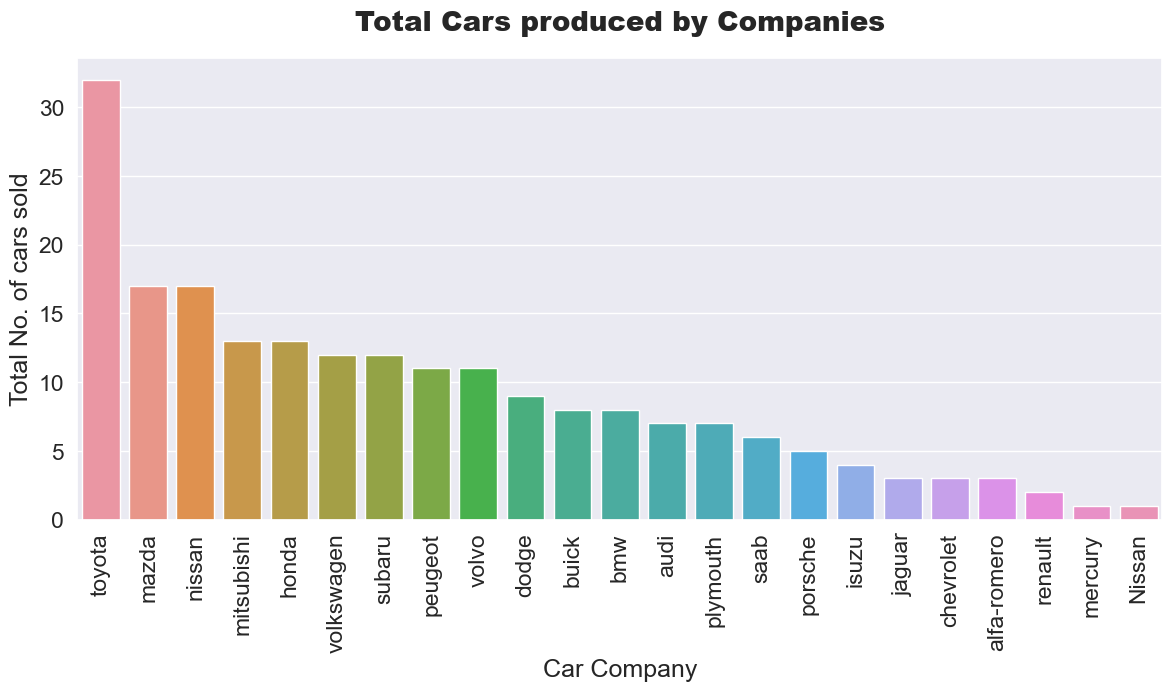

In [78]:
plt.figure(figsize=(14,6))
counts = data["CompanyName"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Car Company")
plt.ylabel("Total No. of cars sold")
plt.title("Total Cars produced by Companies", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

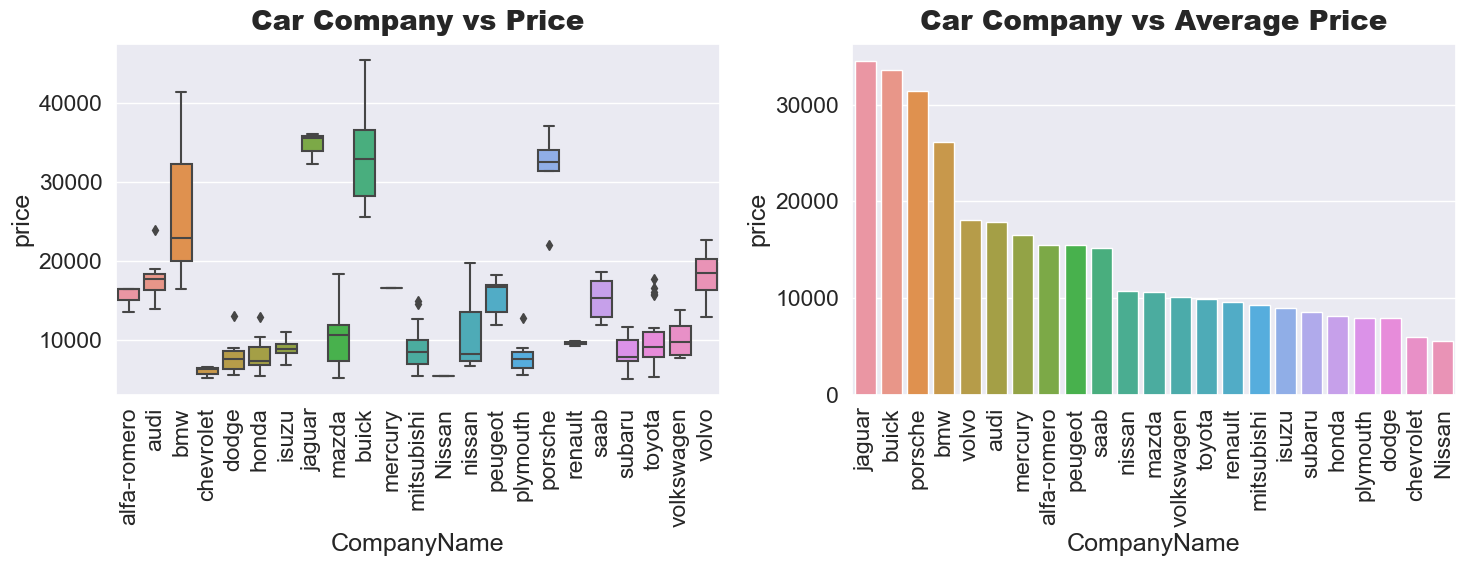

In [81]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x="CompanyName",y="price",data=data)
plt.xticks(rotation=90)
plt.title("Car Company vs Price", pad=10, fontweight="black", fontsize=20)

plt.subplot(1,2,2)
x = pd.DataFrame(data.groupby("CompanyName")["price"].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y="price",data=x) 
plt.xticks(rotation=90)
plt.title("Car Company vs Average Price", pad=10, fontweight="black", fontsize=20)
plt.tight_layout()
plt.show()


In [84]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=data,palette="Set2",order=data[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="price",data=data,palette="Set2")
    plt.title(f"{cols} vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(data.groupby(cols)["price"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x,palette="Set2")
    plt.title(f"{cols} vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

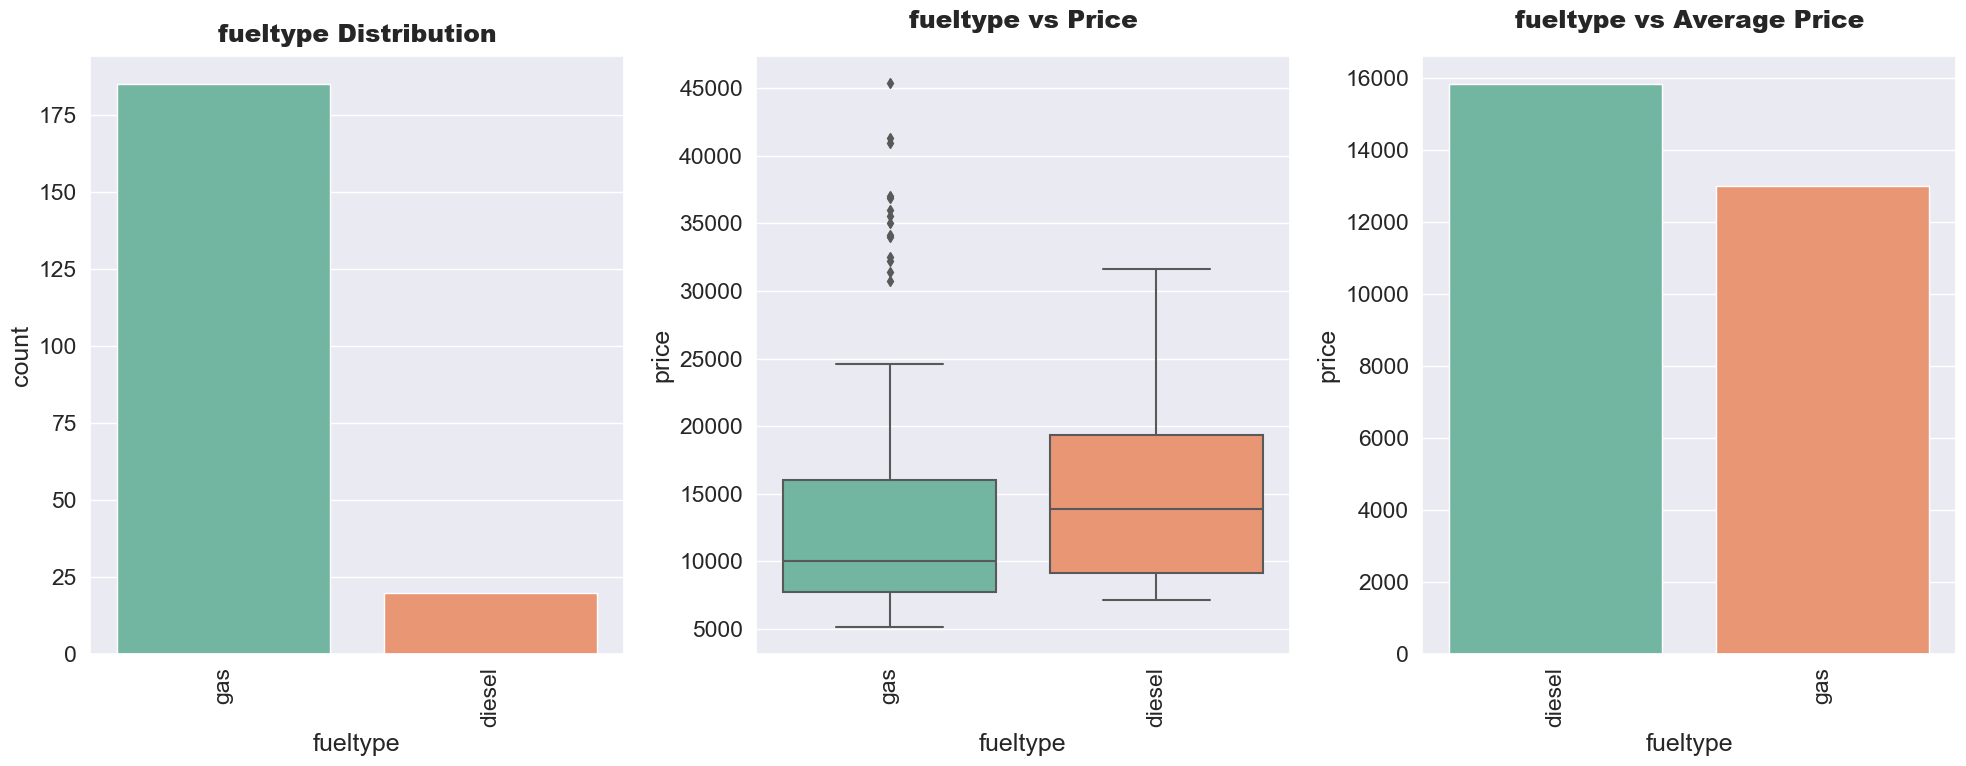

In [85]:
categorical_visualization("fueltype")

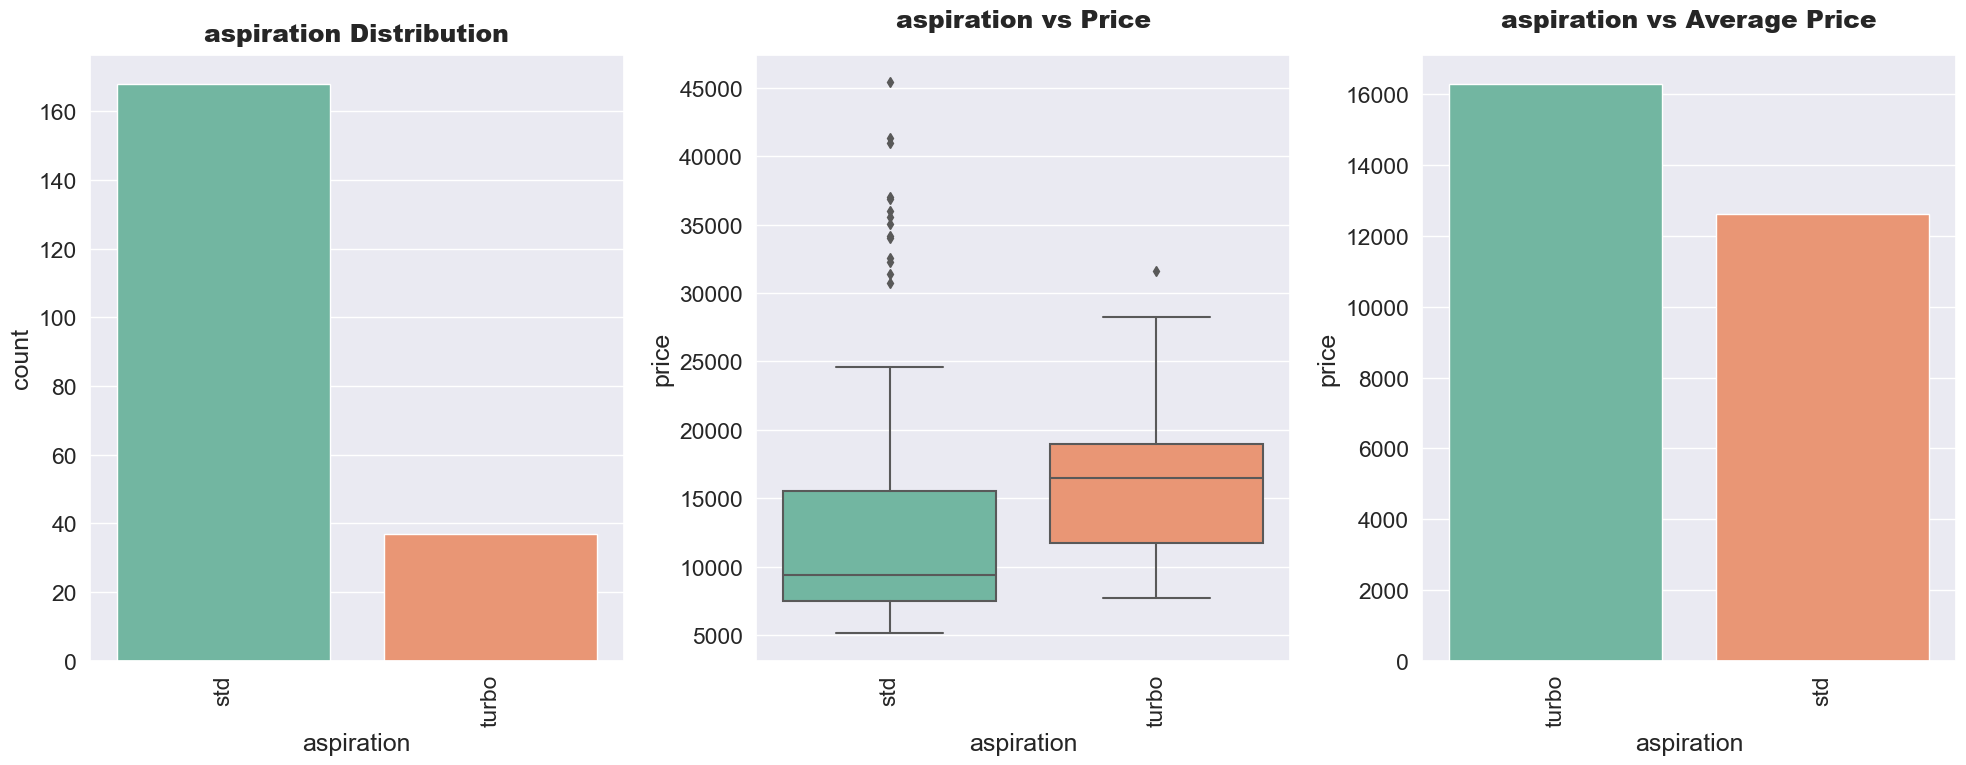

In [86]:
categorical_visualization("aspiration")

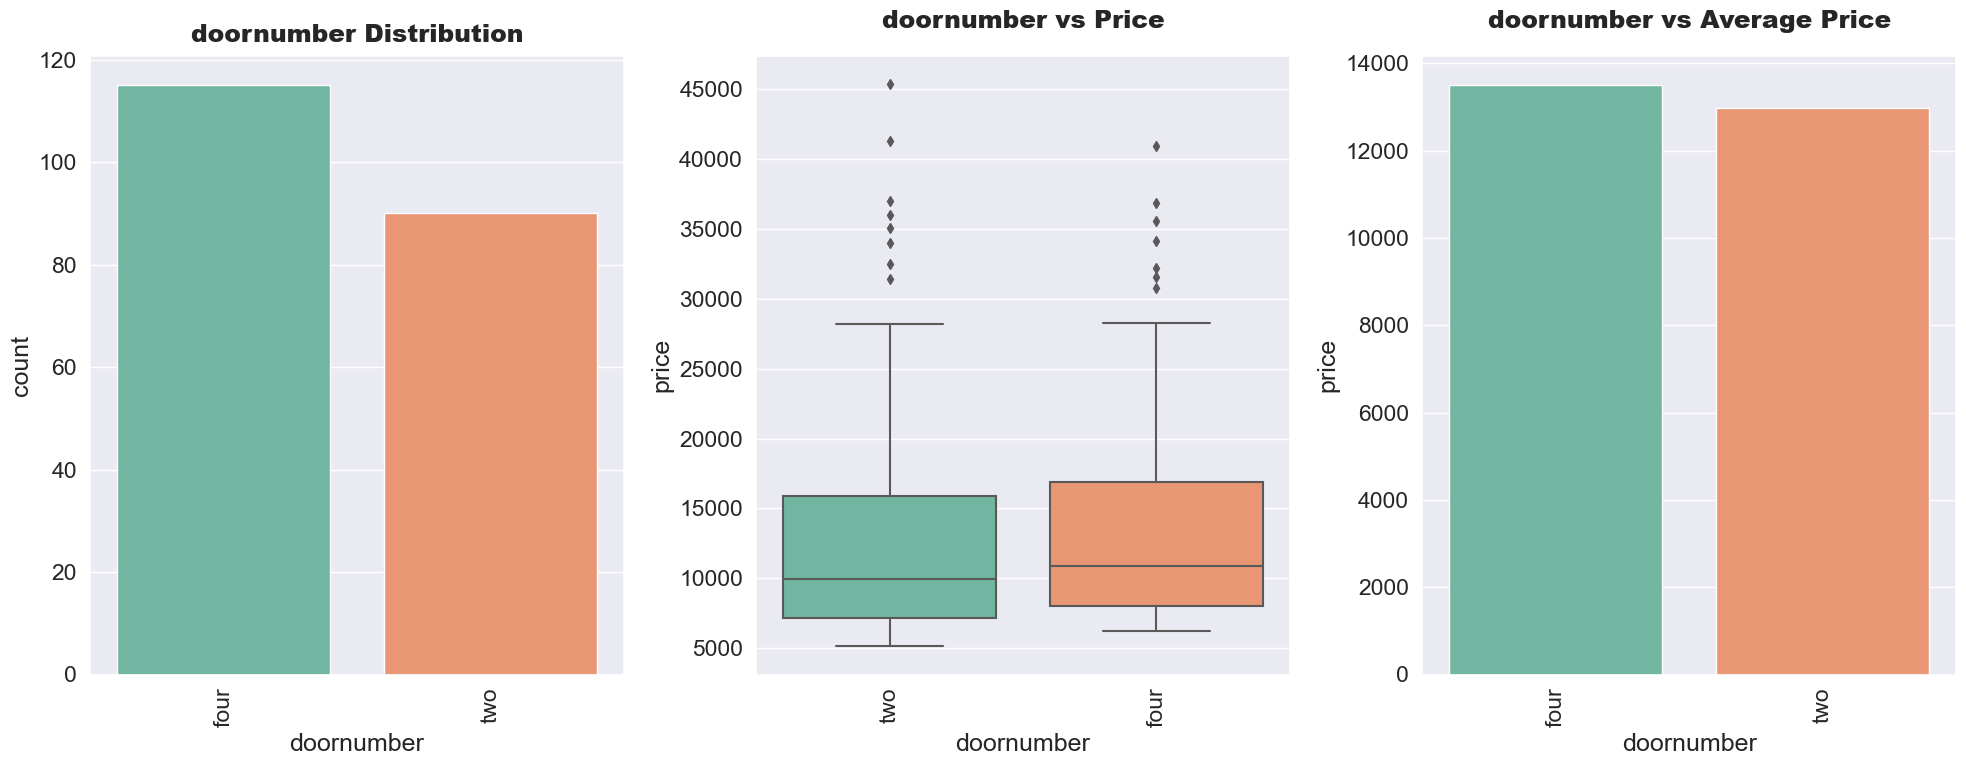

In [87]:
categorical_visualization("doornumber")

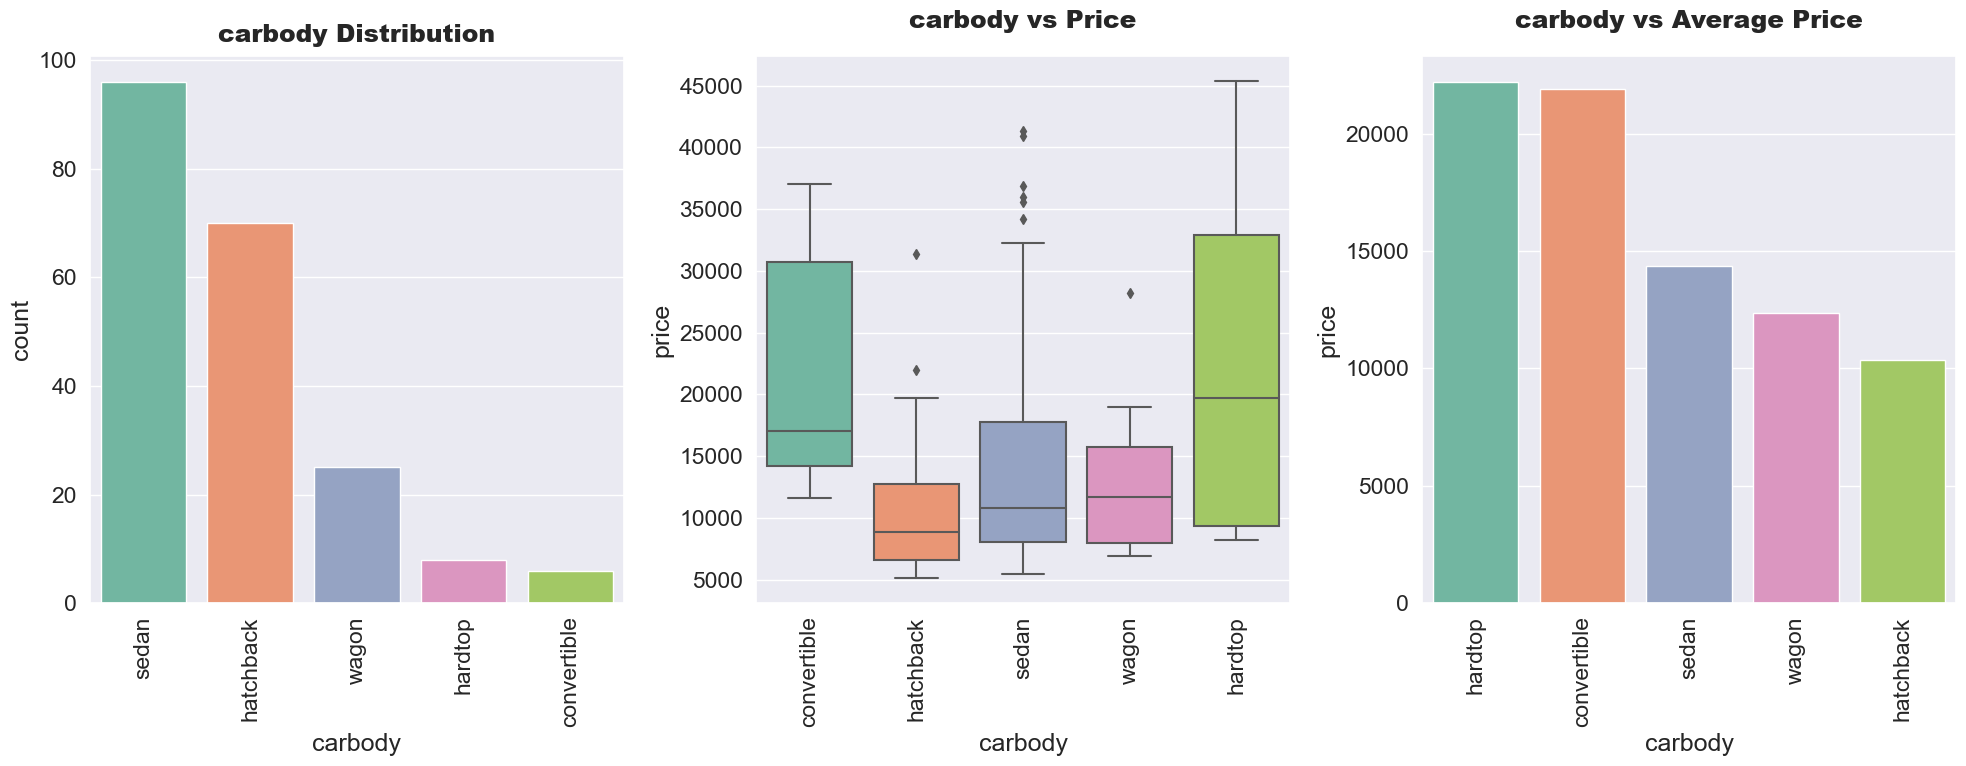

In [88]:
categorical_visualization("carbody")

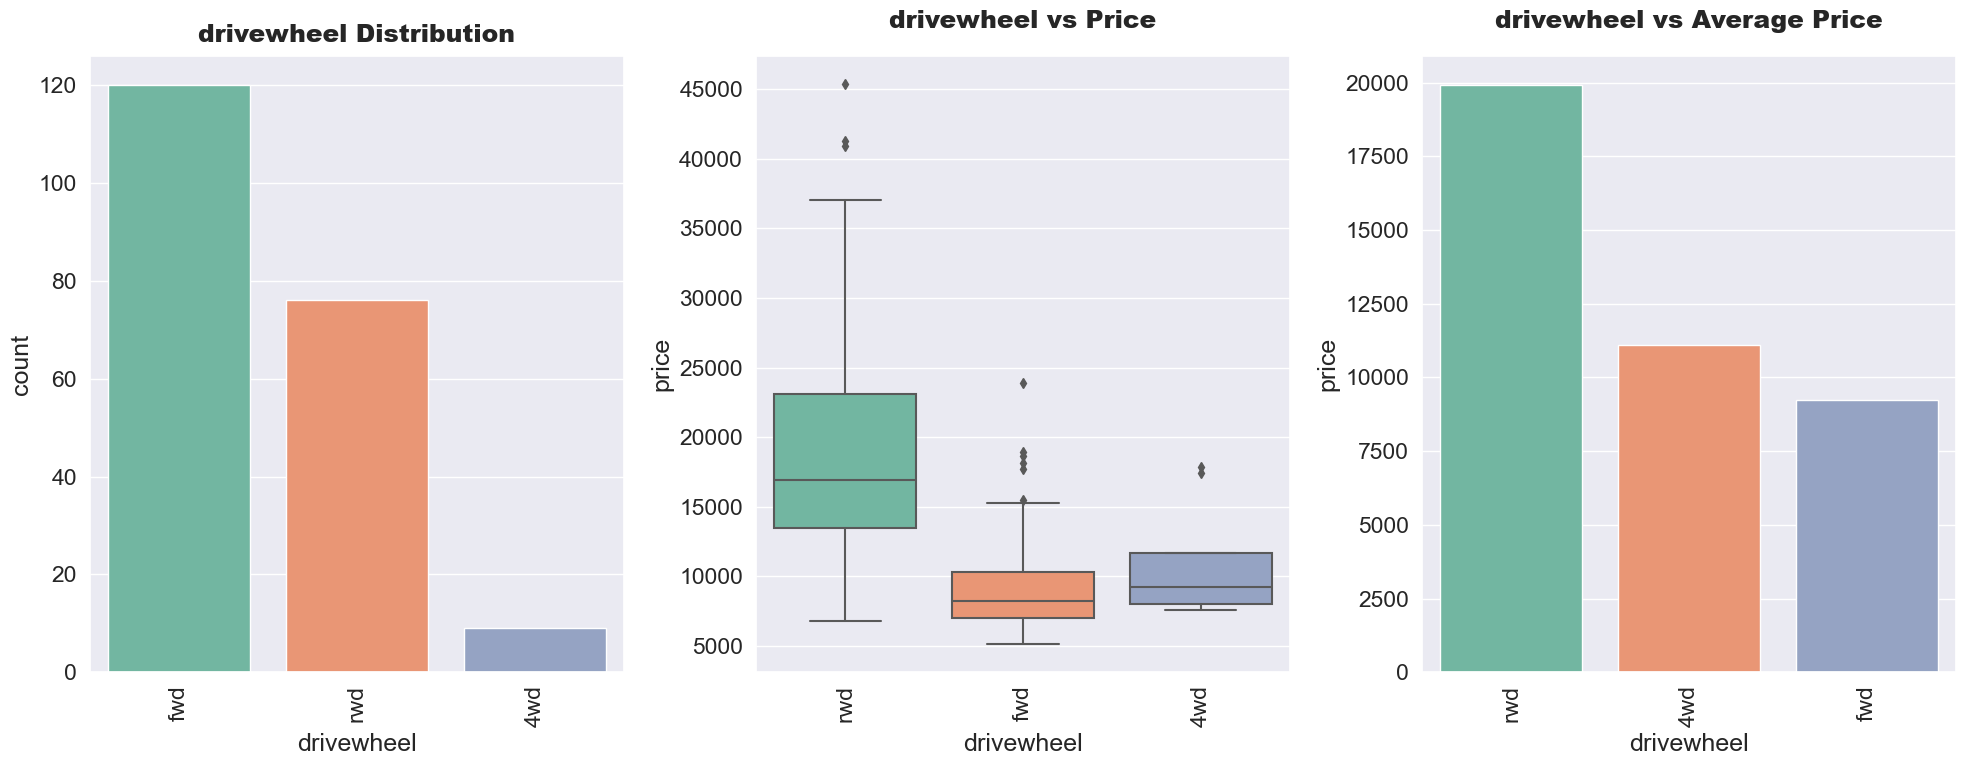

In [89]:
categorical_visualization("drivewheel")

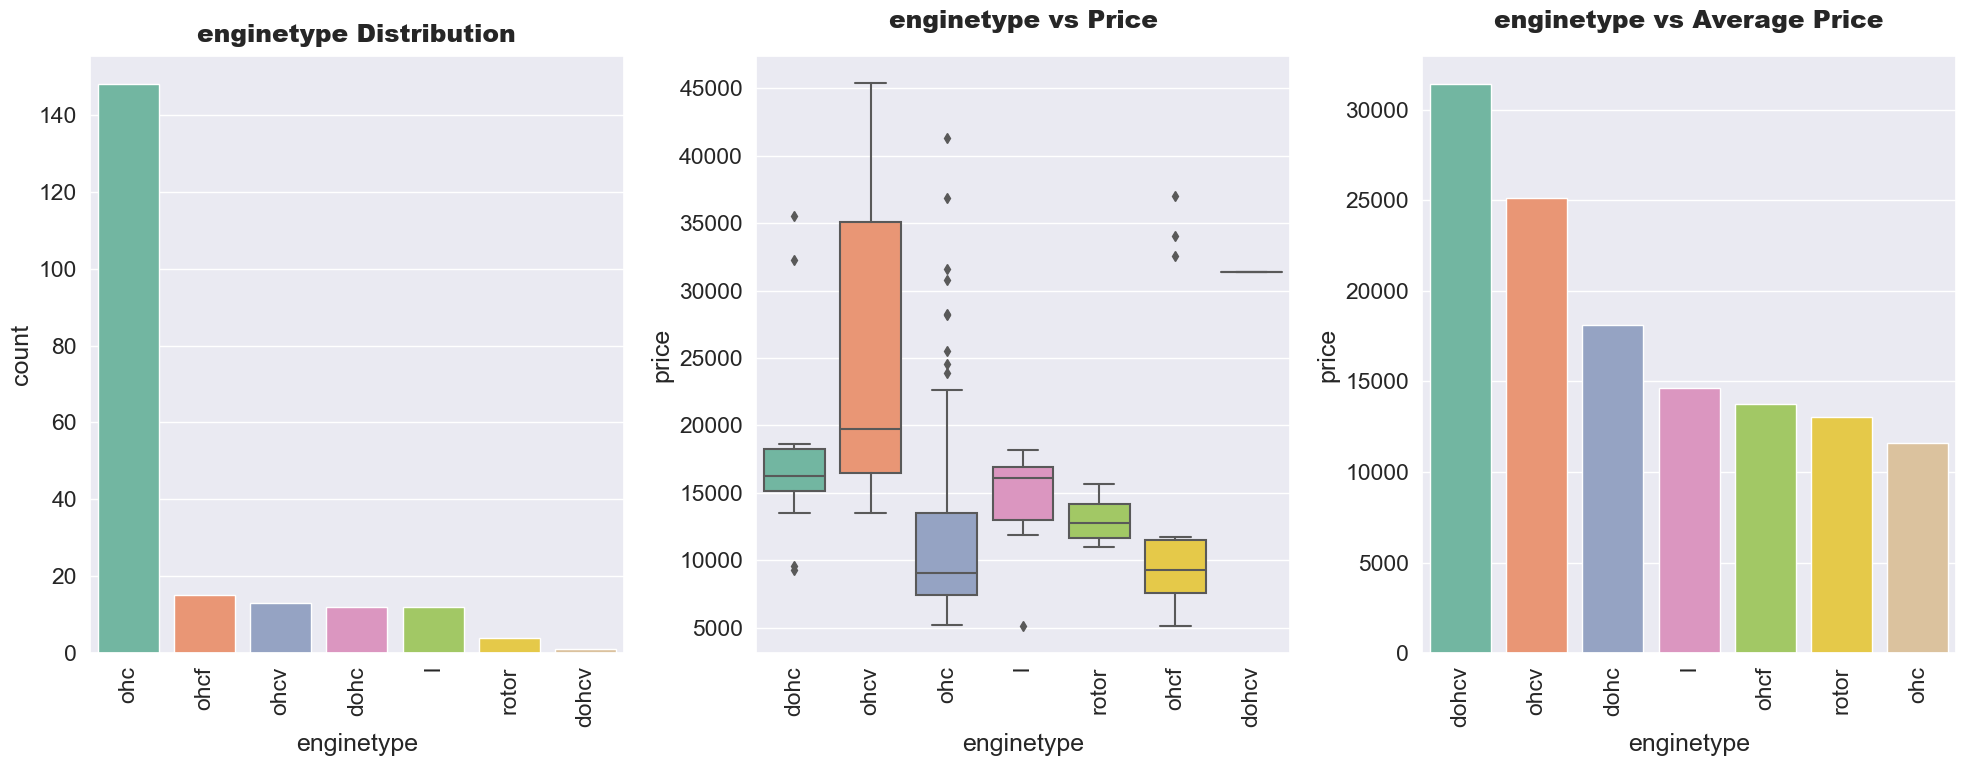

In [91]:
categorical_visualization("enginetype")

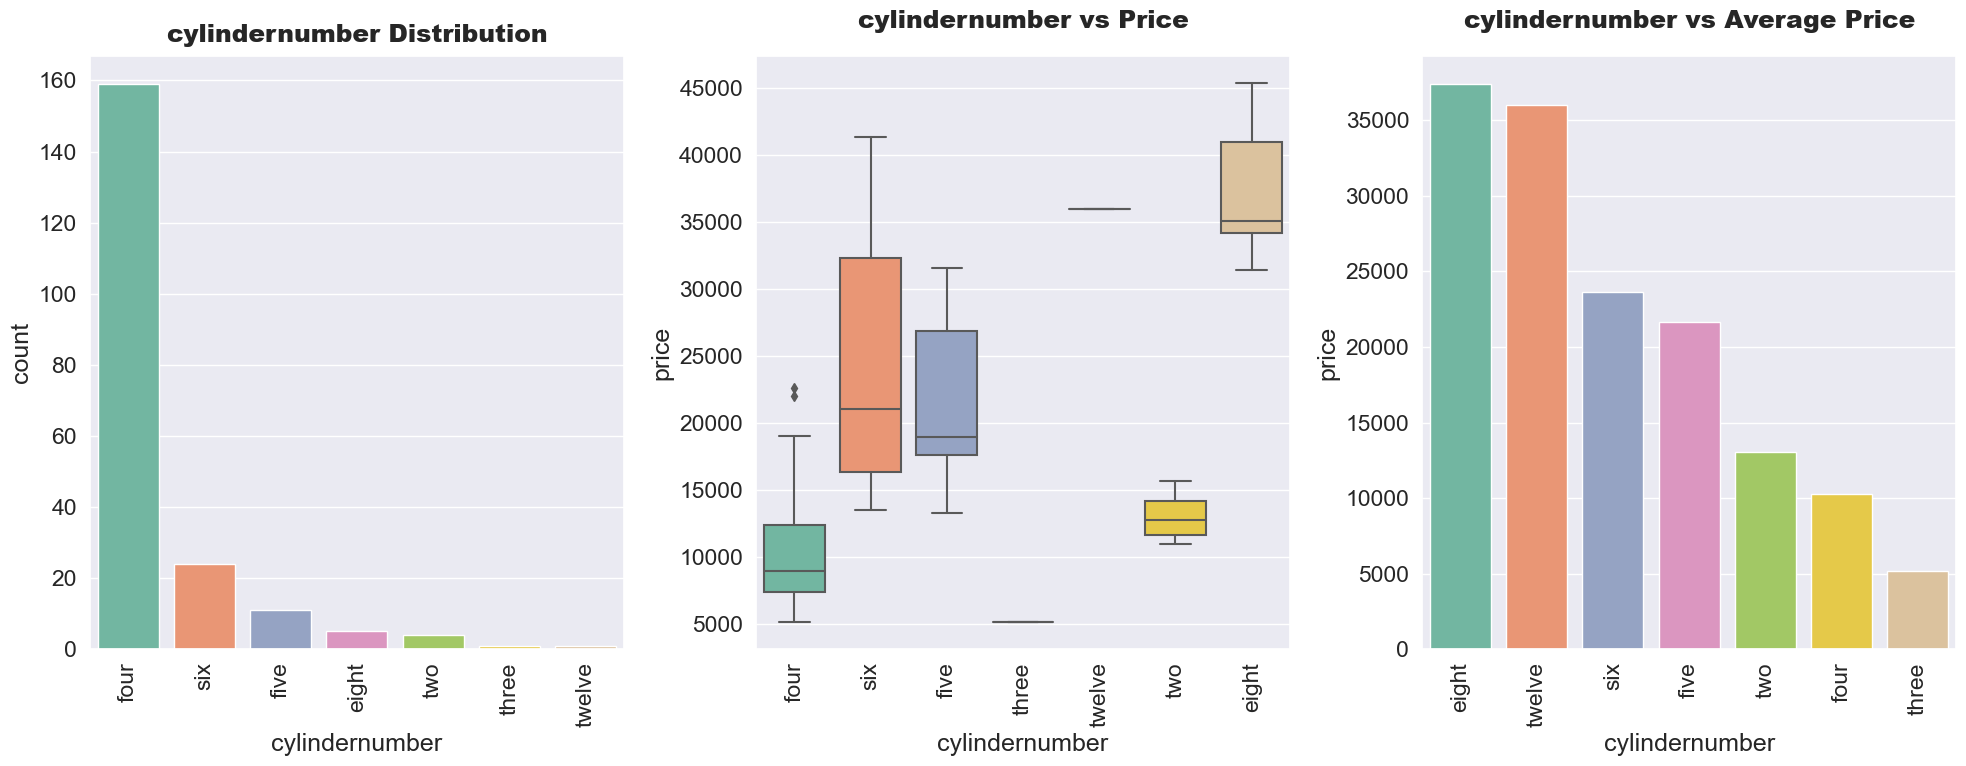

In [92]:
categorical_visualization("cylindernumber")

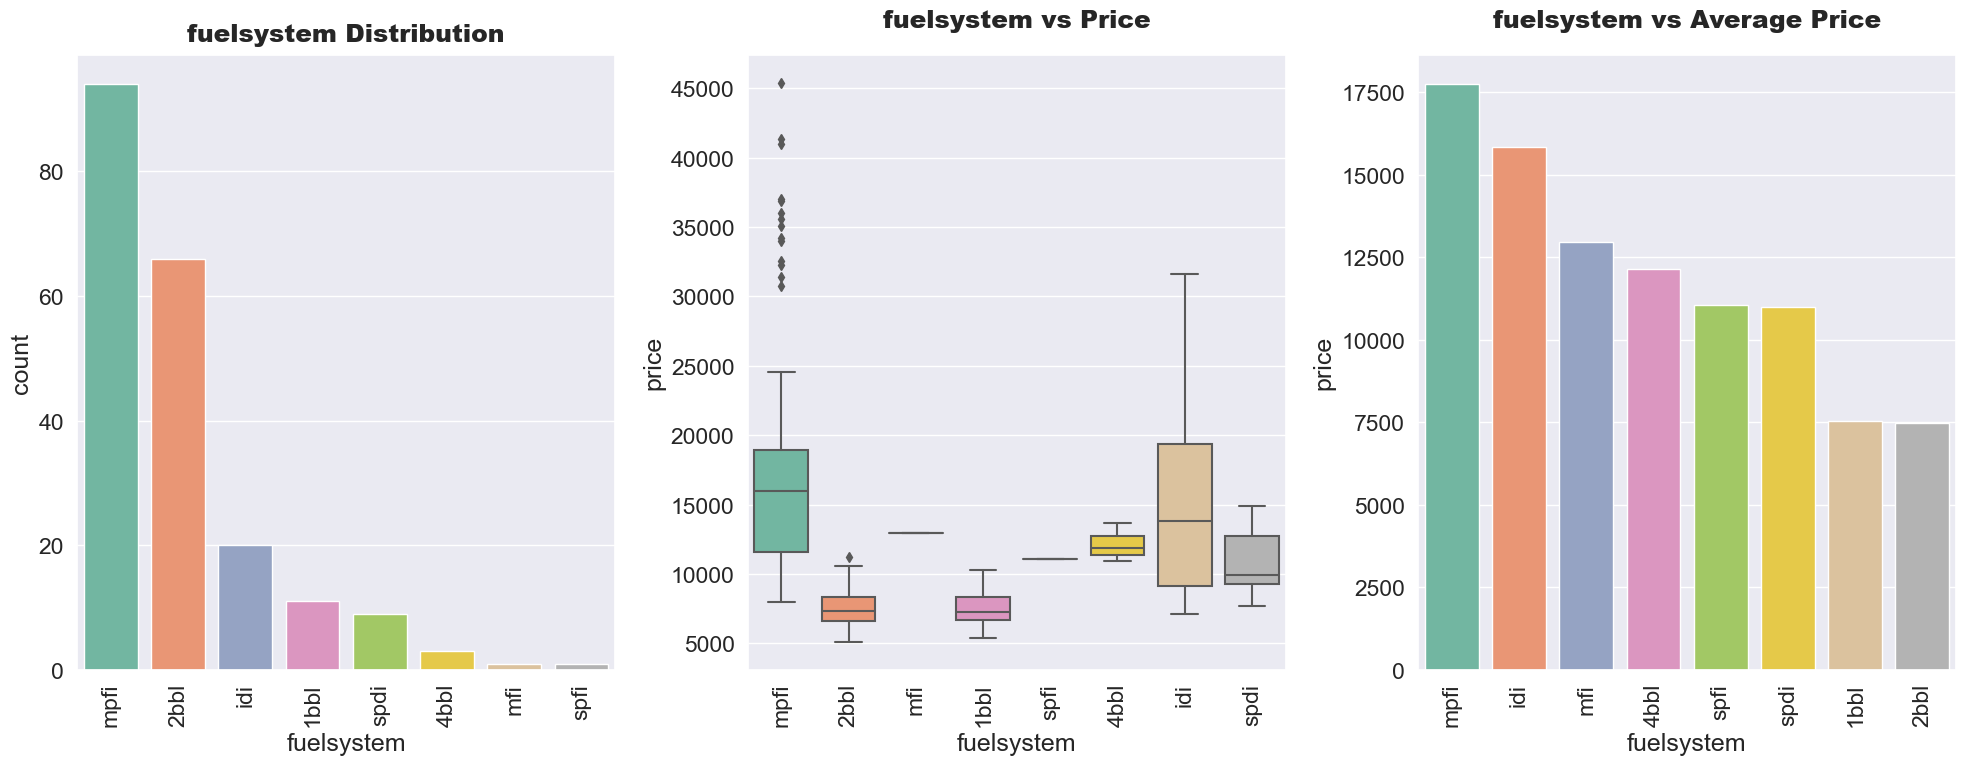

In [93]:
categorical_visualization("fuelsystem")

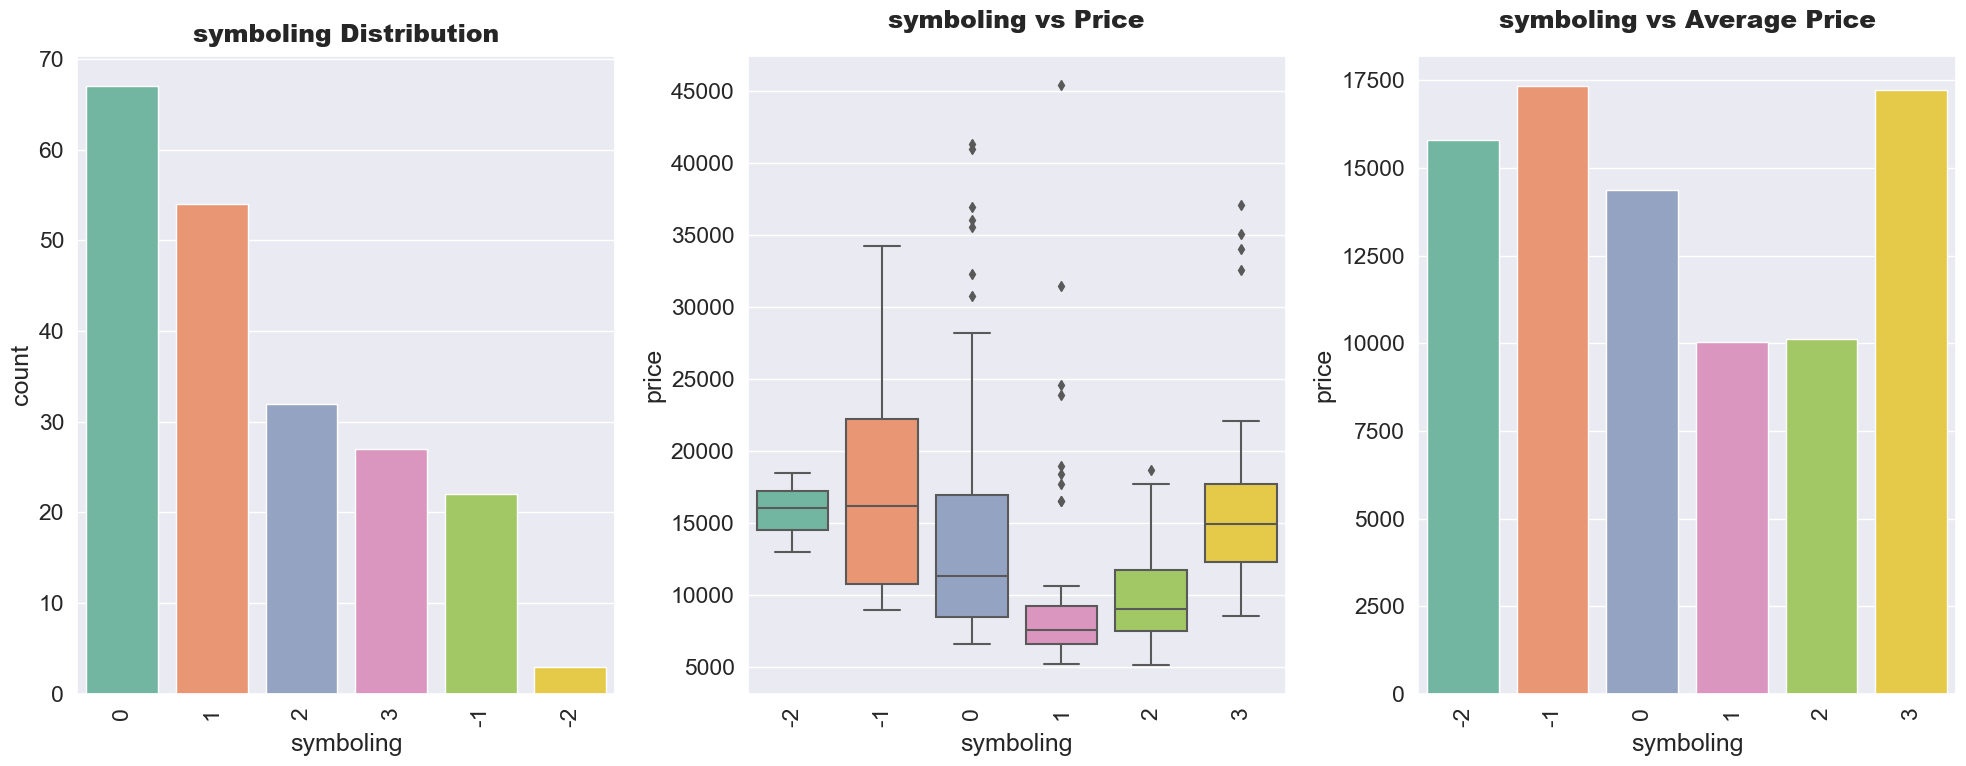

In [94]:
categorical_visualization("symboling")

In [107]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,3,x)
        sns.scatterplot(x=col,y="price",data=data,color="blue")
        plt.title(f"{col} vs Price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1

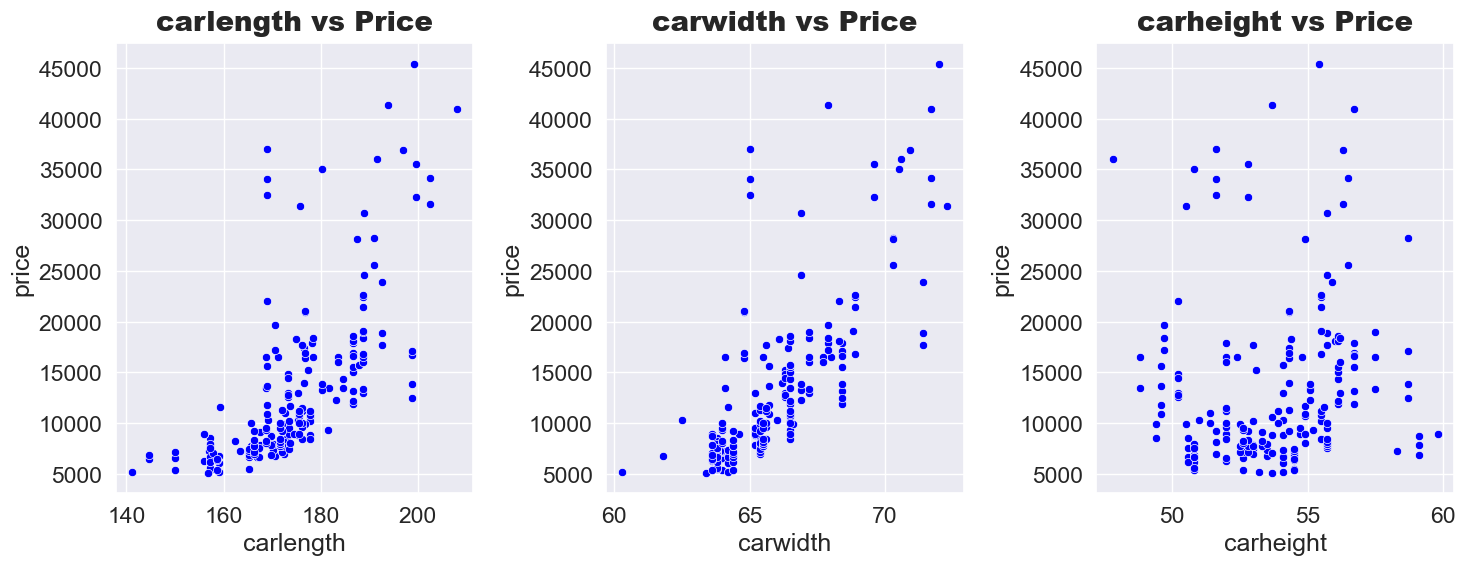

In [108]:
scatter_plot(["carlength","carwidth","carheight"])

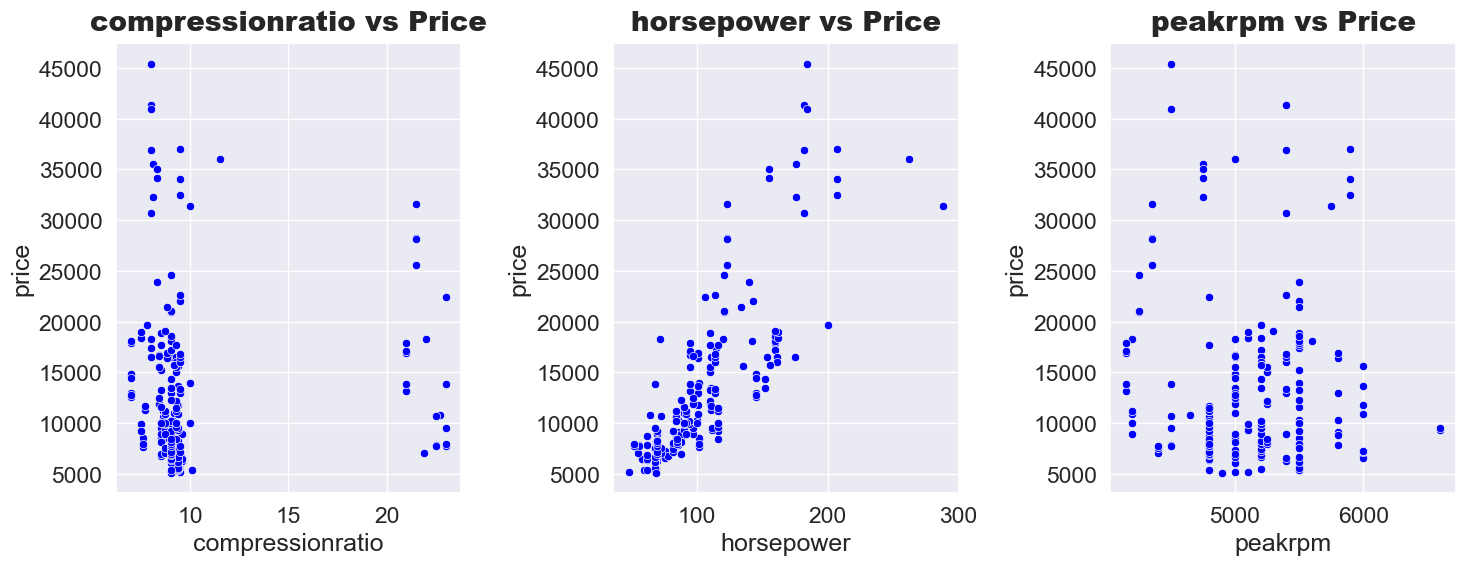

In [109]:
scatter_plot(["compressionratio","horsepower","peakrpm"])

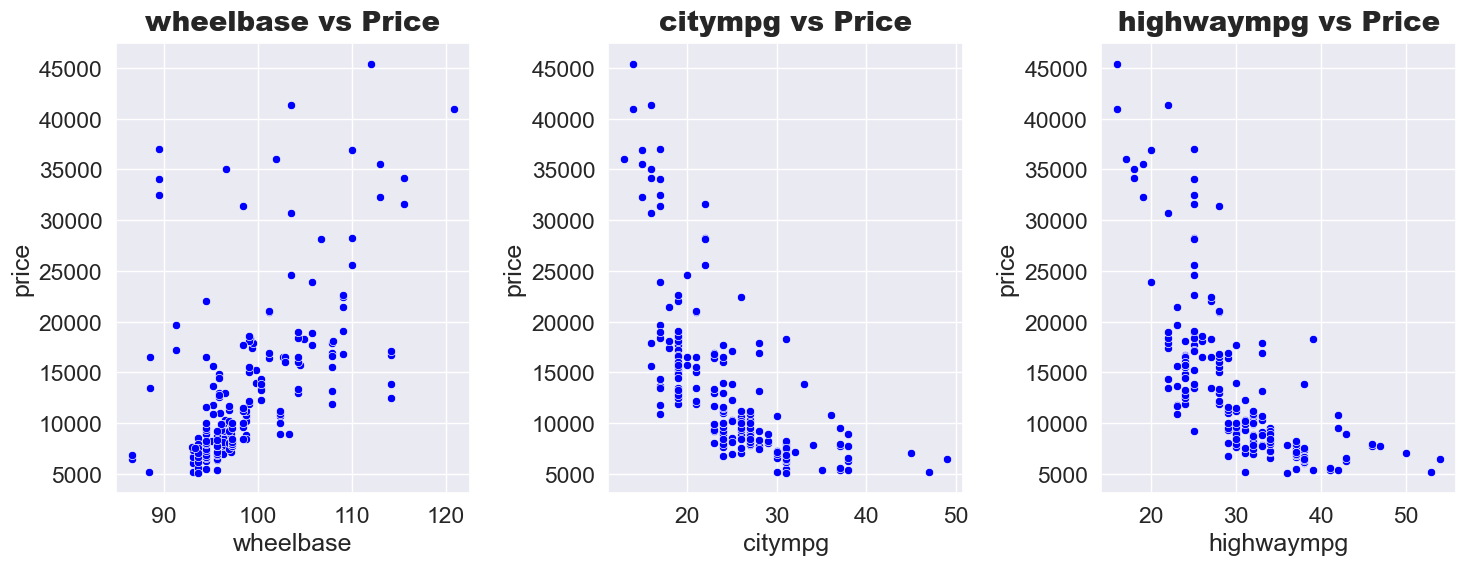

In [113]:
scatter_plot(["wheelbase","citympg","highwaympg"])

In [9]:
y = data.iloc[:,-1]
x = data.iloc[:,1:-1]

In [10]:
x1 = pd.get_dummies(columns=["fueltype","aspiration","doornumber","carbody","drivewheel","enginetype",
                                "cylindernumber","fuelsystem",'CompanyName',],data=x)

In [11]:
x_train , x_test , y_train , y_test = train_test_split(x1, y,test_size=0.15)

# Converting categorical variables to binary

In [12]:
scaler = StandardScaler()
num_cols = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower',
            'citympg','highwaympg','peakrpm']

x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [186]:
x_train = x_train.to_numpy().astype(float)
y_train = y_train.to_numpy().astype(float)

In [187]:
model = keras.models.Sequential([
    keras.layers.Dense(500, activation="selu"),
    keras.layers.Dense(400, activation="selu"),
    keras.layers.Dense(300, activation="selu"),
    keras.layers.Dense(200, activation="selu"),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(1)
])

mse = keras.metrics.MeanSquaredError(name="mse")
rmse = keras.metrics.RootMeanSquaredError(name="rmse")
model.compile(loss="mean_squared_error",
              optimizer="adam",
              metrics=[mse,rmse,'mae'])

history = model.fit(x_train, y_train,validation_split=0.15, epochs=100)

Epoch 1/100
5/5 [==============================] - 3s 105ms/step - loss: 217118608.0000 - mse: 217118608.0000 - rmse: 14734.9453 - mae: 12953.2168 - val_loss: 353097504.0000 - val_mse: 353097504.0000 - val_rmse: 18790.8887 - val_mae: 15362.6436
Epoch 2/100
5/5 [==============================] - 0s 31ms/step - loss: 215634192.0000 - mse: 215634192.0000 - rmse: 14684.4883 - mae: 12899.9902 - val_loss: 350036736.0000 - val_mse: 350036736.0000 - val_rmse: 18709.2695 - val_mae: 15268.3037
Epoch 3/100
5/5 [==============================] - 0s 33ms/step - loss: 212041344.0000 - mse: 212041344.0000 - rmse: 14561.6396 - mae: 12762.9287 - val_loss: 341267104.0000 - val_mse: 341267104.0000 - val_rmse: 18473.4160 - val_mae: 15008.6133
Epoch 4/100
5/5 [==============================] - 0s 36ms/step - loss: 201562976.0000 - mse: 201562976.0000 - rmse: 14197.2881 - mae: 12378.9053 - val_loss: 317786240.0000 - val_mse: 317786240.0000 - val_rmse: 17826.5605 - val_mae: 14308.0566
Epoch 5/100
5/5 [======

In [188]:
x_test = x_test.to_numpy().astype(float)
y_test = y_test.to_numpy().astype(float)

model.evaluate(x_test , y_test  , verbose=0)

[3659801.0, 3659801.0, 1913.0606689453125, 1650.0816650390625]

In [182]:
prediction = model.predict(x_test)

1/1 [==============================] - 0s 145ms/step


In [176]:
for i in range(len(prediction)):
    print('test accuracy:', int(100 - (abs(prediction[i] - y_test[i])/y_test[i])*100)  ) 

test accuracy: 95
test accuracy: 91
test accuracy: 91
test accuracy: 84
test accuracy: 79
test accuracy: 83
test accuracy: 74
test accuracy: 81
test accuracy: 98
test accuracy: 89
test accuracy: 77
test accuracy: 81
test accuracy: 88
test accuracy: 66
test accuracy: 96
test accuracy: 99
test accuracy: 92
test accuracy: 72
test accuracy: 86
test accuracy: 95
test accuracy: 93
test accuracy: 84
test accuracy: 92
test accuracy: 81
test accuracy: 98
test accuracy: 55
test accuracy: 74
test accuracy: 95
test accuracy: 98
test accuracy: 97
test accuracy: 95


In [189]:
neuron_effect = {}

for i in [100,200,300,400,500]:
    model = keras.models.Sequential([
    keras.layers.Dense(i, activation="selu"),
    keras.layers.Dense(1)
    ])
    
    mse = keras.metrics.MeanSquaredError(name="mse")
    rmse = keras.metrics.RootMeanSquaredError(name="rmse")
    model.compile(loss="mean_squared_error",
                  optimizer="adam",
                  metrics=[mse,rmse,'mae'])

    history = model.fit(x_train, y_train,validation_split=0.15, epochs=100)
    
    mae = model.evaluate(x_test , y_test  , verbose=0)[3]
    
    neuron_effect[i] = mae

Epoch 1/100
5/5 [==============================] - 1s 80ms/step - loss: 217411840.0000 - mse: 217411840.0000 - rmse: 14744.8916 - mae: 12963.3467 - val_loss: 354296576.0000 - val_mse: 354296576.0000 - val_rmse: 18822.7676 - val_mae: 15398.4580
Epoch 2/100
5/5 [==============================] - 0s 20ms/step - loss: 217387712.0000 - mse: 217387712.0000 - rmse: 14744.0742 - mae: 12962.6123 - val_loss: 354264256.0000 - val_mse: 354264256.0000 - val_rmse: 18821.9082 - val_mae: 15397.6982
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 217364928.0000 - mse: 217364928.0000 - rmse: 14743.3008 - mae: 12961.9170 - val_loss: 354230752.0000 - val_mse: 354230752.0000 - val_rmse: 18821.0195 - val_mae: 15396.9238
Epoch 4/100
5/5 [==============================] - 0s 16ms/step - loss: 217340176.0000 - mse: 217340176.0000 - rmse: 14742.4619 - mae: 12961.1670 - val_loss: 354197440.0000 - val_mse: 354197440.0000 - val_rmse: 18820.1348 - val_mae: 15396.1338
Epoch 5/100
5/5 [=======

In [190]:
neuron_effect

{100: 12562.7060546875,
 200: 12235.2763671875,
 300: 11913.068359375,
 400: 11559.8447265625,
 500: 11230.84765625}

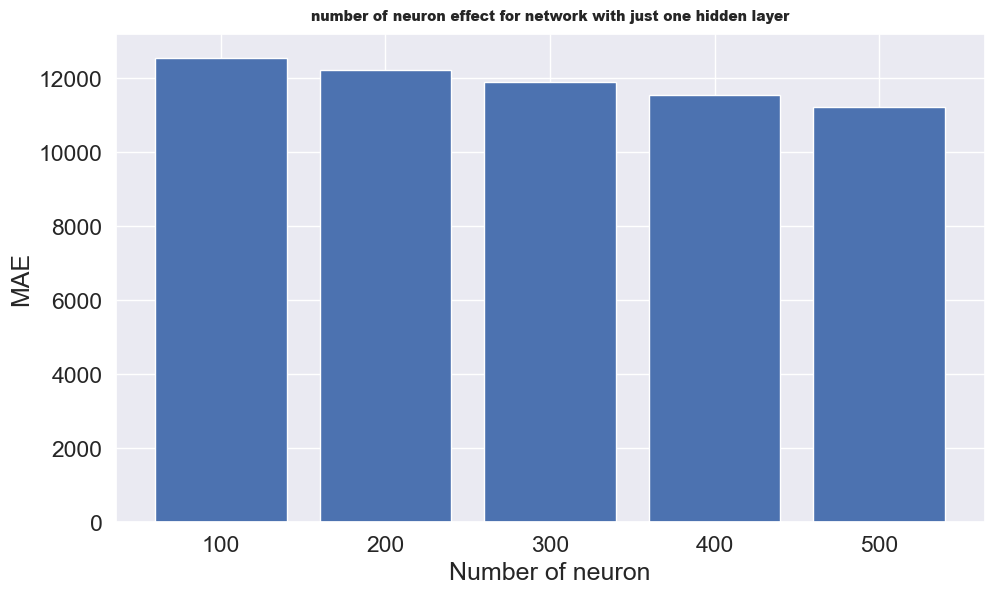

In [139]:
plt.figure(figsize=(10,6))
x=np.array(['100','200','300','400','500'])
y=np.array([12562.7060546875,12235.2763671875,11913.068359375,11559.8447265625,11230.84765625])
plt.bar(x,y) 
plt.title("number of neuron effect for network with just one hidden layer", pad=10, fontweight="black", fontsize=10)
plt.tight_layout()
plt.xlabel("Number of neuron")
plt.ylabel('MAE')
plt.show()

In [192]:
def ann_model(number_of_hidden_layers=1):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=[73]))
    for hidden_layer in range(number_of_hidden_layers):
        model.add(keras.layers.Dense(100, activation="selu"))
    model.add(keras.layers.Dense(1))
 

    mse = keras.metrics.MeanSquaredError(name="mse")
    rmse = keras.metrics.RootMeanSquaredError(name="rmse")
    model.compile(loss="mean_squared_error", optimizer="adam", metrics=[mse,rmse,'mae'])
    
    return model

In [193]:
keras_sk_reg = keras.wrappers.scikit_learn.KerasRegressor(build_fn=ann_model)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10044\579028058.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_sk_reg = keras.wrappers.scikit_learn.KerasRegressor(build_fn=ann_model)


In [194]:
param_grid = {"number_of_hidden_layers":[1, 2, 5, 7]}

In [205]:
from sklearn.model_selection import GridSearchCV

reg_gs = GridSearchCV(keras_sk_reg, param_grid, scoring = 'neg_mean_absolute_error')

grid_search = reg_gs.fit(x_train, y_train,validation_split=0.15, epochs=100)

Epoch 1/100
4/4 [==============================] - 2s 136ms/step - loss: 220605216.0000 - mse: 220605216.0000 - rmse: 14852.7852 - mae: 12838.9033 - val_loss: 236674080.0000 - val_mse: 236674080.0000 - val_rmse: 15384.2148 - val_mae: 12943.6543
Epoch 2/100
4/4 [==============================] - 0s 31ms/step - loss: 220586256.0000 - mse: 220586256.0000 - rmse: 14852.1465 - mae: 12838.3428 - val_loss: 236655792.0000 - val_mse: 236655792.0000 - val_rmse: 15383.6211 - val_mae: 12943.1084
Epoch 3/100
4/4 [==============================] - 0s 28ms/step - loss: 220567664.0000 - mse: 220567664.0000 - rmse: 14851.5205 - mae: 12837.7891 - val_loss: 236637456.0000 - val_mse: 236637456.0000 - val_rmse: 15383.0254 - val_mae: 12942.5566
Epoch 4/100
4/4 [==============================] - 0s 30ms/step - loss: 220548496.0000 - mse: 220548496.0000 - rmse: 14850.8750 - mae: 12837.2080 - val_loss: 236618752.0000 - val_mse: 236618752.0000 - val_rmse: 15382.4170 - val_mae: 12941.9941
Epoch 5/100
4/4 [======

In [223]:
results = reg_gs.cv_results_

results

{'mean_fit_time': array([10.93660107, 11.32881126, 15.02953753, 16.55492926]),
 'std_fit_time': array([1.48357805, 1.60942224, 1.05731406, 0.93965864]),
 'mean_score_time': array([0.18002939, 0.2158886 , 0.28189497, 0.29569483]),
 'std_score_time': array([0.01866671, 0.06016296, 0.1273728 , 0.09723741]),
 'param_number_of_hidden_layers': masked_array(data=[1, 2, 5, 7],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'number_of_hidden_layers': 1},
  {'number_of_hidden_layers': 2},
  {'number_of_hidden_layers': 5},
  {'number_of_hidden_layers': 7}],
 'split0_test_score': array([-14999.17617874,  -5803.18743722,  -2402.1242885 ,  -2601.0460798 ]),
 'split1_test_score': array([-11979.25017896,  -3269.86779785,  -1862.54832589,  -1663.96109096]),
 'split2_test_score': array([-11160.78753401,  -4000.2705695 ,  -1942.45546875,  -1720.73641183]),
 'split3_test_score': array([-12497.95237525,  -4364.67508894,  -1477.78104074,  -1

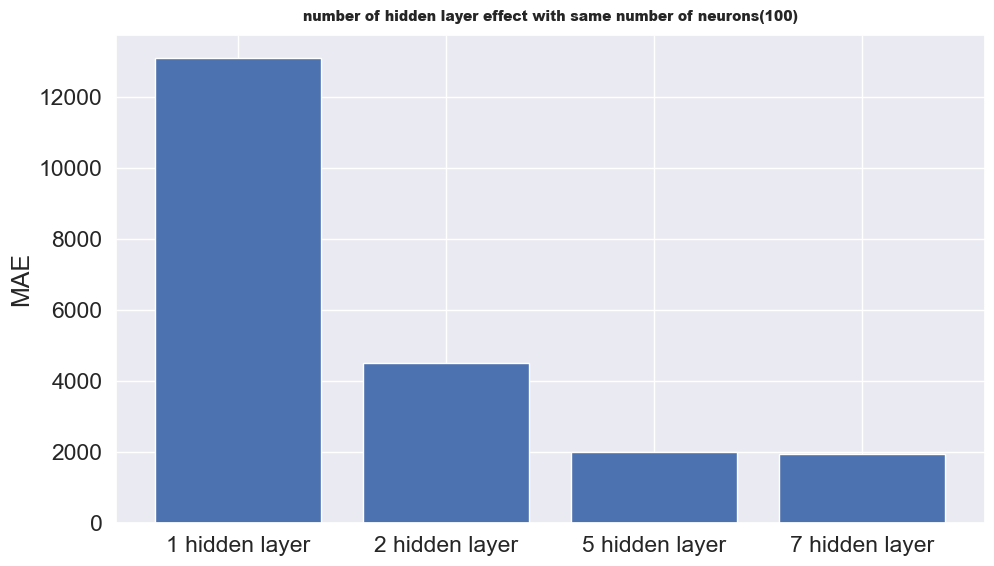

In [141]:
plt.figure(figsize=(10,6))
x=np.array(['1 hidden layer','2 hidden layer','5 hidden layer','7 hidden layer'])
y=np.array([13108.53038021,4505.13191847,1997.535191,1954.3657522])
plt.bar(x,y) 
plt.title("number of hidden layer effect with same number of neurons(100)", pad=10, fontweight="black", fontsize=10)
plt.tight_layout()
plt.ylabel('MAE')
plt.show()

In [43]:
x_train_1 = x_train.iloc[:,:14].to_numpy().astype(float)
x_train_2 = x_train.iloc[:,14:].to_numpy().astype(float)

In [66]:
input1 = keras.layers.Input(shape = x_train_1[1].shape)
input2 = keras.layers.Input(shape = x_train_2[1].shape)
hidden_layer1 = keras.layers.Dense(100, activation="selu")(input2)
concatenate_layer = keras.layers.Concatenate()([input1, hidden_layer1])
hidden_layer2 = keras.layers.Dense(200, activation="selu")(concatenate_layer)
hidden_layer3 = keras.layers.Dense(100, activation="selu")(hidden_layer2)
hidden_layer4 = keras.layers.Dense(10, activation="selu")(hidden_layer3)
output = keras.layers.Dense(1)(hidden_layer4)
model = keras.Model(inputs=[input1,input2], outputs=[output])

model.compile(loss="mean_squared_error",
              optimizer="adam",
              metrics=["mean_absolute_error"])

model.fit([x_train_1,x_train_2], y_train, epochs=100, validation_split = 0.15)

Epoch 1/100
5/5 [==============================] - 3s 119ms/step - loss: 239329056.0000 - mean_absolute_error: 13119.9658 - val_loss: 242772080.0000 - val_mean_absolute_error: 13766.7383
Epoch 2/100
5/5 [==============================] - 0s 26ms/step - loss: 239084432.0000 - mean_absolute_error: 13111.1875 - val_loss: 242505424.0000 - val_mean_absolute_error: 13757.1826
Epoch 3/100
5/5 [==============================] - 0s 25ms/step - loss: 238787440.0000 - mean_absolute_error: 13100.4365 - val_loss: 242144672.0000 - val_mean_absolute_error: 13744.1328
Epoch 4/100
5/5 [==============================] - 0s 32ms/step - loss: 238388672.0000 - mean_absolute_error: 13085.4443 - val_loss: 241627920.0000 - val_mean_absolute_error: 13725.4561
Epoch 5/100
5/5 [==============================] - 0s 23ms/step - loss: 237786208.0000 - mean_absolute_error: 13063.6260 - val_loss: 240866400.0000 - val_mean_absolute_error: 13697.8330
Epoch 6/100
5/5 [==============================] - 0s 23ms/step - los

In [144]:
print('*** There is no benefits for widening network, I have tried any network shapes and finnally realized that we have to make network deeper to catch better results...***')

*** There is no benefits for widening network, I have tried any network shapes and finnally realized that we have to make network deeper to catch better results...***
